# 🧮 Problem 2: Sampling Variability of the Standard Deviation

## Objective

1. Generating 100,000 random samples of size 10 from the **standard normal distribution**.
2. Computing the **sample standard deviation** (`ddof=1`) and the **population standard deviation** (`ddof=0`) for each sample.
3. Plotting both distributions on the same axes to visualize their differences.
4. Discuss how these differences change as sample size increases.


Number of samples: 100000, Sample size: 10
Mean SD (ddof=0): 0.92343 | Std of SDs: 0.22107
Mean SD (ddof=1): 0.97338 | Std of SDs: 0.23302
Difference in means (ddof=1 - ddof=0): 0.04995


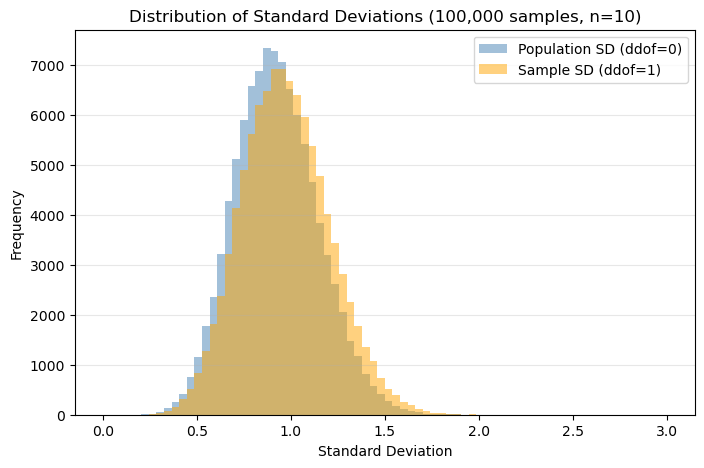

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
n_samples = 100_000   # number of samples
sample_size = 10      # each sample size
rng = np.random.default_rng(42)

# --- Generating samples from standard normal distribution ---
samples = rng.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

# --- Computing standard deviations for each sample ---
sd_ddof0 = np.std(samples, axis=1, ddof=0)  # population SD (biased)
sd_ddof1 = np.std(samples, axis=1, ddof=1)  # sample SD (unbiased)

# --- Computing summary statistics ---
mean_ddof0 = sd_ddof0.mean()
mean_ddof1 = sd_ddof1.mean()
std_ddof0 = sd_ddof0.std(ddof=0)
std_ddof1 = sd_ddof1.std(ddof=0)

print(f"Number of samples: {n_samples}, Sample size: {sample_size}")
print(f"Mean SD (ddof=0): {mean_ddof0:.5f} | Std of SDs: {std_ddof0:.5f}")
print(f"Mean SD (ddof=1): {mean_ddof1:.5f} | Std of SDs: {std_ddof1:.5f}")
print(f"Difference in means (ddof=1 - ddof=0): {mean_ddof1 - mean_ddof0:.5f}")

# --- Plotting histograms ---
plt.figure(figsize=(8,5))
bins = np.linspace(0, 3.0, 75)
plt.hist(sd_ddof0, bins=bins, alpha=0.5, label='Population SD (ddof=0)', color='steelblue')
plt.hist(sd_ddof1, bins=bins, alpha=0.5, label='Sample SD (ddof=1)', color='orange')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviations (100,000 samples, n=10)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


## 🔍 Interpretation

- The histogram shows that **`ddof=0`** (population SD) tends to be **smaller** than **`ddof=1`** (sample SD).  
  This means the `ddof=0` estimator **underestimates** the true population SD for small samples.

- On average:
  - `Mean SD (ddof=0)` ≈ 0.92  
  - `Mean SD (ddof=1)` ≈ 0.97  
  - True population SD = 1.0  

- The **sample SD (`ddof=1`)** corrects for bias and provides an *unbiased variance estimator*, which results in an SD that’s closer to 1 on average.

- As the **sample size increases**, both histograms will:
  - Become narrower (less variability)
  - Shift closer to 1 (the true population SD)
  - Show less difference between `ddof=0` and `ddof=1`

---

### 🧭 Summary Table

| Estimator | ddof | Mean SD (n=10) | Bias Direction | Notes |
|------------|------|----------------|----------------|--------|
| Population SD | 0 | ≈ 0.92 | Underestimates | Uses divisor *n* |
| Sample SD | 1 | ≈ 0.97 | Slightly low, less biased | Uses divisor *n-1* |

---